In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style("whitegrid")
%config InlineBackend.figure_formats = ['svg']
tab20b = plt.colormaps.get('tab20b')
# %matplotlib widget

In [17]:
# load data, conver to data frame
# x: cpu cores
# y: array size (task size)
dat = np.loadtxt("../data.txt")
dat_seq = np.loadtxt("../data_seq.txt")
xstep = 5e4
ystep = 4
xmin  = int(min(dat[:, 0]) / xstep)
xmax  = int(max(dat[:, 0]) / xstep)
ymin  = int(min(dat[:, 1]) / ystep)
ymax  = int(max(dat[:, 1]) / ystep)
Nx    = xmax - xmin + 1
Ny    = ymax - ymin + 1
xticks = (xmin + np.array(list(range(Nx)))) * xstep
yticks = (ymin + np.array(list(range(Ny)))) * ystep
xticks = np.int64(xticks)
yticks = np.int64(yticks)
exetime_dat       = np.zeros([Nx, Ny])
exetime_count     = np.zeros([Nx, Ny])
cputime_dat       = np.zeros([Nx, Ny])
exetime_dat_seq   = np.zeros(Nx)
exetime_count_seq = np.zeros(Nx)
cputime_dat_seq   = np.zeros(Nx)
for d in dat:
    i = int(d[0]/xstep) - 1
    j = int(d[1]/ystep) - 1
    exetime_dat[i, j] += d[2]
    cputime_dat[i, j] += d[3]
    exetime_count[i, j] += 1
for d in dat_seq:
    i = int(d[0]/xstep) - 1
    exetime_dat_seq[i] += d[2]
    cputime_dat_seq[i] += d[3]
    exetime_count_seq[i] += 1
    
exetime_dat = exetime_dat / exetime_count
exetime_dat_seq = exetime_dat_seq / exetime_count_seq
rate =  exetime_dat_seq.reshape([-1, 1]) / exetime_dat
eff  = rate / yticks
ks = 1/rate - 1/yticks
runtime_df = pd.DataFrame(exetime_dat,
                  columns=[(i+1)*ystep for i in range(Ny)],
                  index=[int((i+1)*xstep) for i in range(Nx)])
rate_df = pd.DataFrame(rate, 
                  columns=[(i+1)*ystep for i in range(Ny)],
                  index=[int((i+1)*xstep) for i in range(Nx)])
eff_df = pd.DataFrame(np.log10(eff), 
                  columns=[(i+1)*ystep for i in range(Ny)],
                  index=[int((i+1)*xstep) for i in range(Nx)])
ks_df = pd.DataFrame(np.log10(ks), 
                  columns=[(i+1)*ystep for i in range(Ny)],
                  index=[int((i+1)*xstep) for i in range(Nx)])

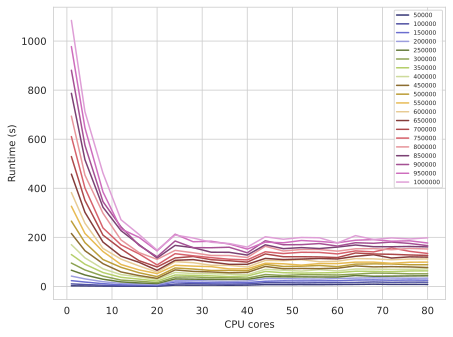

In [3]:
start = 0
end   = 20
for i in range(start, end):
    plt.plot([1] + list(yticks), [exetime_dat_seq[i]] + list(exetime_dat[i, :]), label=str(xticks[i]), color=tab20b.colors[i])
plt.legend(prop={'size': 6})
plt.xlabel("CPU cores")
plt.ylabel("Runtime (s)")
plt.tight_layout()
plt.savefig("runtime-core.pdf")

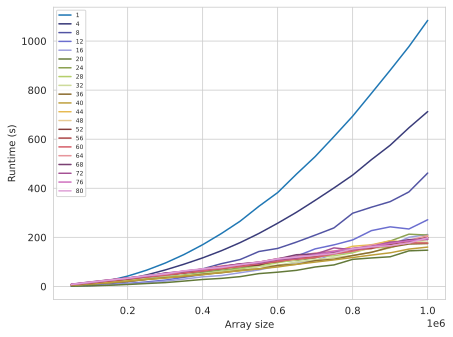

In [4]:
start = 0
end   = 20
plt.plot(xticks, exetime_dat_seq, label='1')
for i in range(start, end):
    plt.plot(xticks, exetime_dat[:, i], label=str(yticks[i]), color=tab20b.colors[i])
plt.legend(prop={'size': 6})
plt.xlabel("Array size")
plt.ylabel("Runtime (s)")
plt.tight_layout()
plt.savefig("runtime-size.pdf")

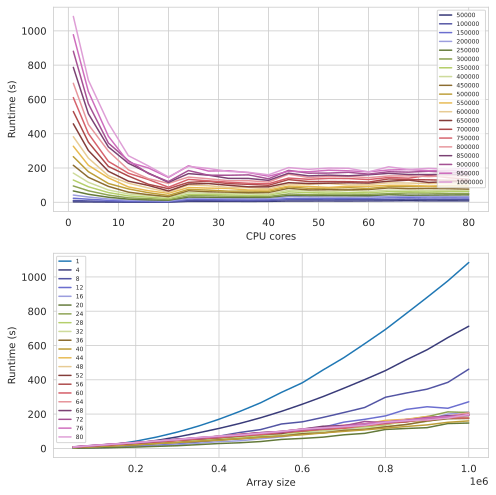

In [5]:
fig, axes = plt.subplots(2, 1, figsize=[7, 7])
start = 0
end   = 20
axes[1].plot(xticks, exetime_dat_seq, label=str(1))
for i in range(start, end):
    axes[0].plot([1] + list(yticks), [exetime_dat_seq[i]] + list(exetime_dat[i, :]), label=str(xticks[i]), color=tab20b.colors[i])
    axes[1].plot(xticks, exetime_dat[:, i], label=str(yticks[i]), color=tab20b.colors[i])
axes[0].legend(prop={'size': 6})
axes[1].legend(prop={'size': 6})
axes[0].set_xlabel("CPU cores")
axes[0].set_ylabel("Runtime (s)")
axes[1].set_xlabel("Array size")
axes[1].set_ylabel("Runtime (s)")
plt.tight_layout()
plt.savefig("runtime.pdf")

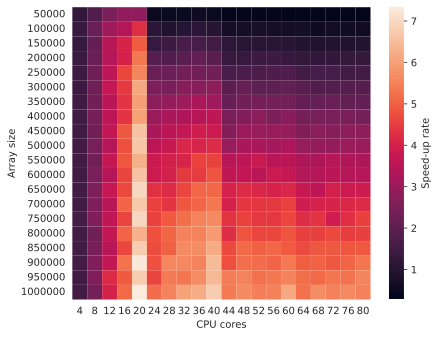

In [6]:
ax = sns.heatmap(rate_df, cbar_kws={'label': 'Speed-up rate'})
ax.set_xlabel("CPU cores")
ax.set_ylabel("Array size")
plt.tight_layout()
plt.savefig("rate_heatmap.pdf")

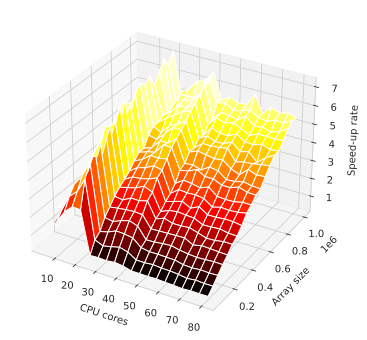

In [7]:
ax = plt.axes(projection="3d")
X,Y = np.meshgrid(xticks, yticks)
ax.plot_surface(Y, X, rate.T, cmap=plt.get_cmap('hot'))
ax.set_xlabel("CPU cores")
ax.set_ylabel("Array size")
ax.set_zlabel("Speed-up rate")
plt.tight_layout()
plt.savefig("rate_heatmap_3d.pdf")

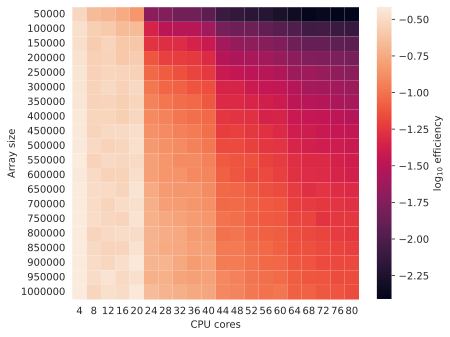

In [8]:
ax = sns.heatmap(eff_df, cbar_kws={'label': r'$\log_{10}$ efficiency'})
ax.set_xlabel("CPU cores")
ax.set_ylabel("Array size")
plt.tight_layout()
plt.savefig("logeff_heatmap.pdf")

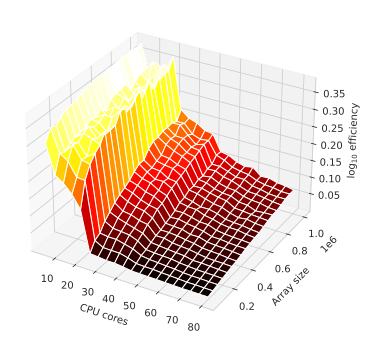

In [9]:
ax = plt.axes(projection="3d")
X,Y = np.meshgrid(xticks, yticks)
ax.plot_surface(Y, X, eff.T, cmap=plt.get_cmap('hot'))
ax.set_xlabel("CPU cores")
ax.set_ylabel("Array size")
ax.set_zlabel(r'$\log_{10}$ efficiency')
plt.tight_layout()
plt.savefig("logeff_heatmap_3d.pdf")

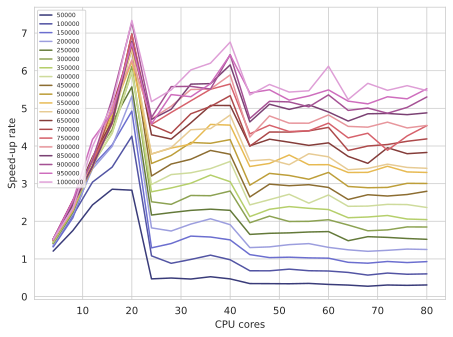

In [10]:
start = 0
end   = 20
for i in range(start, end):
    plt.plot(yticks, rate[i, :], label=str(xticks[i]), color=tab20b.colors[i])
plt.legend(prop={'size': 6})
plt.xlabel("CPU cores")
plt.ylabel("Speed-up rate")
plt.tight_layout()
plt.savefig("rate-cpu.pdf")

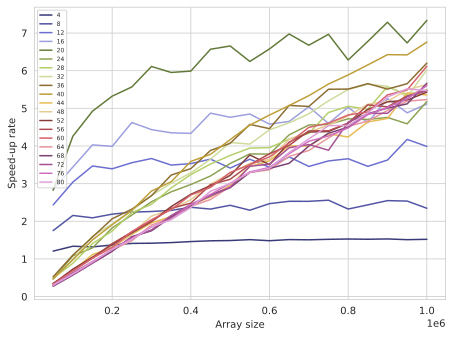

In [11]:
start = 0
end   = 20
# fig = plt.figure(figsize=[8, 5])
for i in range(start, end):
    plt.plot(xticks, rate[:, i], label=str(yticks[i]), color=tab20b.colors[i])
plt.legend(prop={'size': 6})
plt.xlabel("Array size")
plt.ylabel("Speed-up rate")
plt.tight_layout()
plt.savefig("rate-size.pdf")

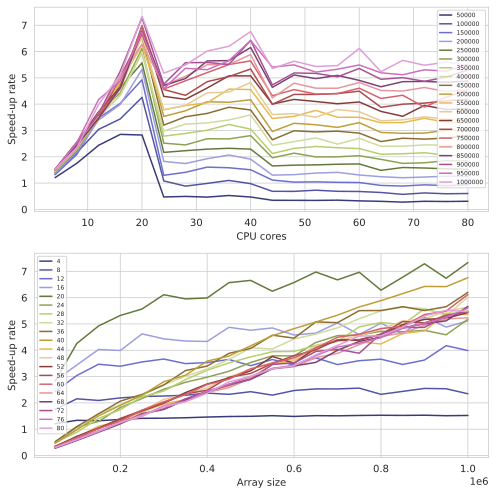

In [12]:
fig, axes = plt.subplots(2, 1, figsize=[7, 7])
start = 0
end   = 20
for i in range(start, end):
    axes[0].plot(yticks, rate[i, :], label=str(xticks[i]), color=tab20b.colors[i])
    axes[1].plot(xticks, rate[:, i], label=str(yticks[i]), color=tab20b.colors[i])
axes[0].legend(prop={'size': 6})
axes[1].legend(prop={'size': 6})
axes[0].set_xlabel("CPU cores")
axes[0].set_ylabel("Speed-up rate")
axes[1].set_xlabel("Array size")
axes[1].set_ylabel("Speed-up rate")
plt.tight_layout()
plt.savefig("rate.pdf")

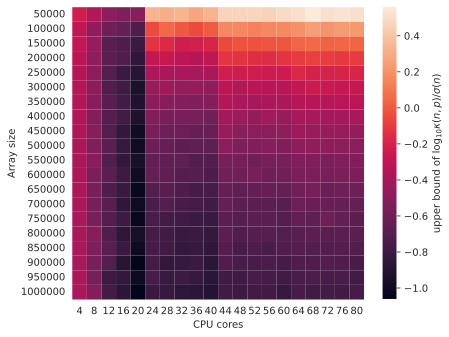

In [18]:
# estimation of kappa/sigma
ax = sns.heatmap(ks_df, cbar_kws={'label': r'upper bound of $\log_{10}\kappa(n,p)/\sigma(n)$'})
ax.set_xlabel("CPU cores")
ax.set_ylabel("Array size")
plt.tight_layout()
plt.savefig("ks_heatmap.pdf")